In [19]:
import os
os.getcwd()
os.chdir(r"src")
import matplotlib.pyplot as plt
import utils

In [176]:
%reload_ext autoreload
%autoreload 2

In [10]:
# ---- utils libs ----
import datetime
import sys


# --- Import functions from utils.py ---
sys.path.insert(0,'..')
from utils import convertToSequenceParameters, read_pickle_dataset

# --- Import functions from preprocessing.py ---
sys.path.insert(0,'..')
from preprocessing import data_preprocessing

# --- Import functions from visualize.py ---
sys.path.insert(0,'../src/visualization')
from visualize import visualize_load_curve_dataset, visualize_load_curve_resampled, visualize_train_load_curve, visualize_test_load_curve, visualize_test_train_load_curve, visualize_report_preprocessing

# --- Import functions from build_model.py ---
sys.path.insert(0,'../src/models/')
from build_model import model

# --- Import functions from train_model.py ---
sys.path.insert(0,'../src/models/')
from train_model import train

# --- Import functions from eval_model.py ---
sys.path.insert(0,'../src/models/')
from eval_model import plot_train_val_loss, plot_reconstructed_base_load_curve, plot_activity_histogram, plot_activity_distibrution, confusion_matrix, evaluate

# --- Import functions from predict_model.py ---
sys.path.insert(0,'../src/models/')
from predict_model import X_train_predict, X_test_predict, compute_threshold, compute_train_mae_loss, compute_test_mae_loss, plot_train_mae_loss, plot_test_mae_loss, detect_anomaly_sequence, get_anomaly_df, get_df_predict, get_specific_anomaly_sequence, plot_anomaly_sequences, plot_anomaly_data_points

# --- Import functions from postprocessing.py ---
sys.path.insert(0,'..')
from postprocessing import data_postprocessing, plot_postprocessing_anomalies

In [13]:
# --- Define global variable ---
TIME_STEP = datetime.timedelta(minutes=1, seconds=30) # duration of a step in the resample dataset, originally 1 second
DURATION_TIME = datetime.timedelta(minutes=60) # duration of a sequence
OVERLAP_PERIOD_PERCENT = 0.8 # 0.5 <=> 50% overlapping
TIMEFRAMES = [(datetime.time(0,0,0), datetime.time(3,0,0))] # timeframes we consider as unactive
STRATEGY = "off_peak_time" # device, off_peak_time, label 
METHOD = "method_prediction_1" # method to choose for aggregating sequences
print("CONVERTING GLOBAL USER PARAMETERS...\n")
SEQUENCE_LENGTH, OVERLAP_PERIOD = convertToSequenceParameters(TIME_STEP, DURATION_TIME, OVERLAP_PERIOD_PERCENT)
print("\t\tValeur choisie \t Equivalent sequence\nTimestep : \t {}\nDuration :\t {} \t -->  {} \nOverlap :\t {} \t\t -->  {}".format(TIME_STEP, DURATION_TIME, SEQUENCE_LENGTH, OVERLAP_PERIOD_PERCENT, OVERLAP_PERIOD))



CONVERTING GLOBAL USER PARAMETERS...

		Valeur choisie 	 Equivalent sequence
Timestep : 	 0:01:30
Duration :	 1:00:00 	 -->  40 
Overlap :	 0.8 		 -->  32


In [47]:
import pandas as pd
import numpy as np
%reload_ext autoreload
import preprocessing
%autoreload 2
import utils

# <>
Objectif : développer une meilleure stratégie de train/test split


---- Post Processing Parameters ----
TIMEFRAMES =  [(datetime.time(0, 0), datetime.time(3, 0))]
SEQUENCE_LENGTH =  40
RESAMPLE_PERIOD =  0:01:30
OVERLAP_PERIOD =  32
STRATEGY =  off_peak_time


#### Loading and Resampling Data... ####

#### Creating Train and Test set... ####


#### Rescaling Data... ####


#### Creating Test Sequence... ####


Strategy chosen :  off_peak_time

#### Creating Train Sequence... ####





X_train.shape (561, 40, 1)
y_train.shape (561, 40, 3)
X_test.shape (1506, 40, 1)
y_test.shape (1506, 40, 3)


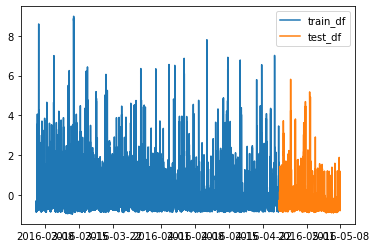

In [205]:
# train test split method = None
train_df, test_df, X_train, y_train, X_test, y_test = data_preprocessing(timeframes = TIMEFRAMES
                                                                         ,sequence_length = SEQUENCE_LENGTH
                                                                         ,overlap_period = OVERLAP_PERIOD
                                                                         ,resample_period = TIME_STEP
                                                                         ,strategy = STRATEGY
                                                                         ,split_method=None)
plt.plot(train_df.index, train_df["mains"], label="train_df")
plt.plot(test_df.index, test_df["mains"], label="test_df")
plt.legend()
print("\n\n")
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)


---- Post Processing Parameters ----
TIMEFRAMES =  [(datetime.time(0, 0), datetime.time(3, 0))]
SEQUENCE_LENGTH =  40
RESAMPLE_PERIOD =  0:01:30
OVERLAP_PERIOD =  32
STRATEGY =  off_peak_time


#### Loading and Resampling Data... ####

#### Creating Train and Test set... ####


#### Rescaling Data... ####


#### Creating Test Sequence... ####


Strategy chosen :  off_peak_time

#### Creating Train Sequence... ####


X_train.shape (572, 40, 1)
y_train.shape (572, 40, 3)
X_test.shape (1275, 40, 1)
y_test.shape (1275, 40, 3)


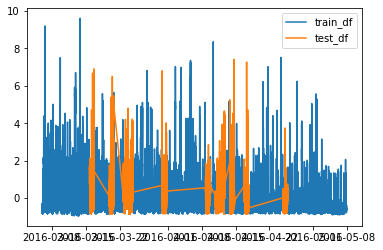

In [206]:
# train test split method = "random_days"
train_df, test_df, X_train, y_train, X_test, y_test = data_preprocessing(timeframes = TIMEFRAMES
                                                                         ,sequence_length = SEQUENCE_LENGTH
                                                                         ,overlap_period = OVERLAP_PERIOD
                                                                         ,resample_period = TIME_STEP
                                                                         ,strategy = STRATEGY
                                                                         ,split_method="random_days")
plt.plot(train_df.index, train_df["mains"], label="train_df")
plt.plot(test_df.index, test_df["mains"], label="test_df")
plt.legend()
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

In [211]:
visualize_train_load_curve(train_df, STRATEGY)
visualize_test_load_curve(test_df, STRATEGY)
visualize_test_train_load_curve(train_df, test_df, STRATEGY)


 power mean train load curve 8.543464430074581e-17

 power mean test load curve 0.051223142298956366


LOAD DATASET...


Load Curve Dataset Resampled each None
                     mains
datetime                  
2016-03-06 00:00:00  473.0
2016-03-06 00:00:01  474.0
2016-03-06 00:00:02  476.0
2016-03-06 00:00:03  476.0
2016-03-06 00:00:04  475.0
2016-03-06 00:00:05  476.0
2016-03-06 00:00:06  478.0
2016-03-06 00:00:07  476.0
2016-03-06 00:00:08  478.0
2016-03-06 00:00:09  477.0
2016-03-06 00:00:10  476.0
2016-03-06 00:00:11  478.0
2016-03-06 00:00:12  476.0
2016-03-06 00:00:13  477.0
2016-03-06 00:00:14  475.0
2016-03-06 00:00:15  479.0
2016-03-06 00:00:16  476.0
2016-03-06 00:00:17  477.0
2016-03-06 00:00:18  479.0
2016-03-06 00:00:19  478.0
2016-03-06 00:00:20  479.0
2016-03-06 00:00:21  478.0
2016-03-06 00:00:22  476.0
2016-03-06 00:00:23  476.0
2016-03-06 00:00:24  477.0
2016-03-06 00:00:25  478.0
2016-03-06 00:00:26  478.0
2016-03-06 00:00:27  477.0
2016-03-06 00:00:28  478.0
2016-03-06 00:00:29  477.0


PLOTING LOAD CURVE RESAMPLED...


CONVERTING GLOBAL USER PARAMETERS...

		Val

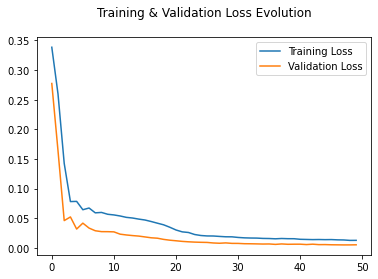

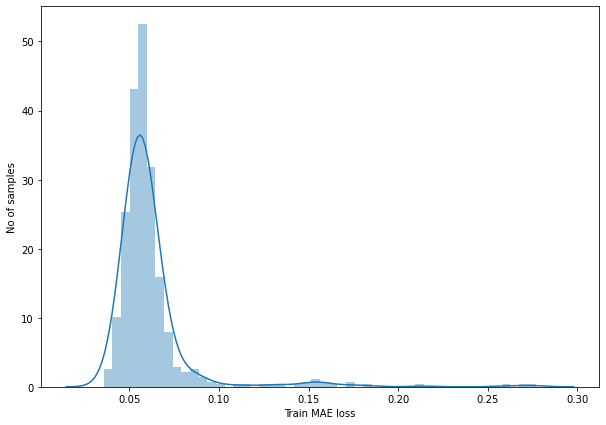

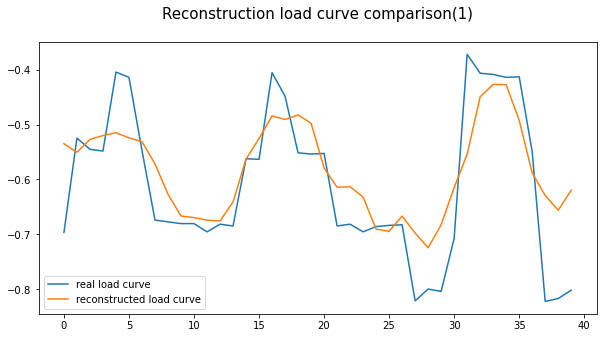

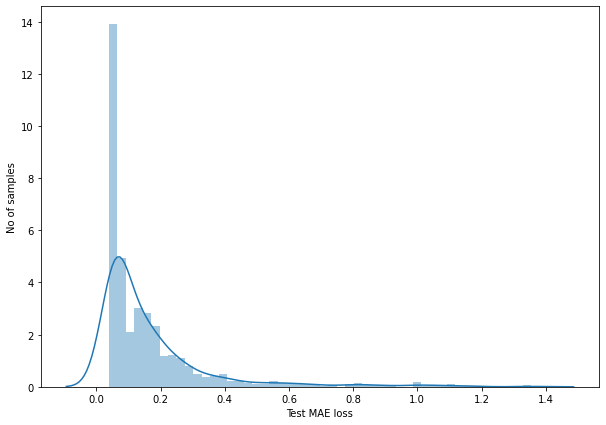

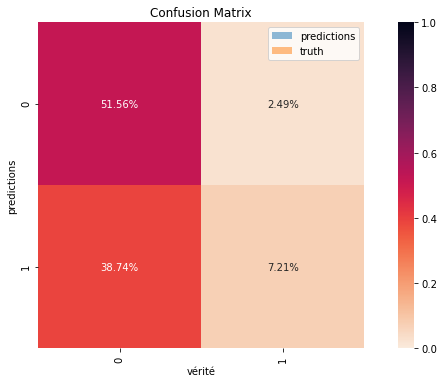

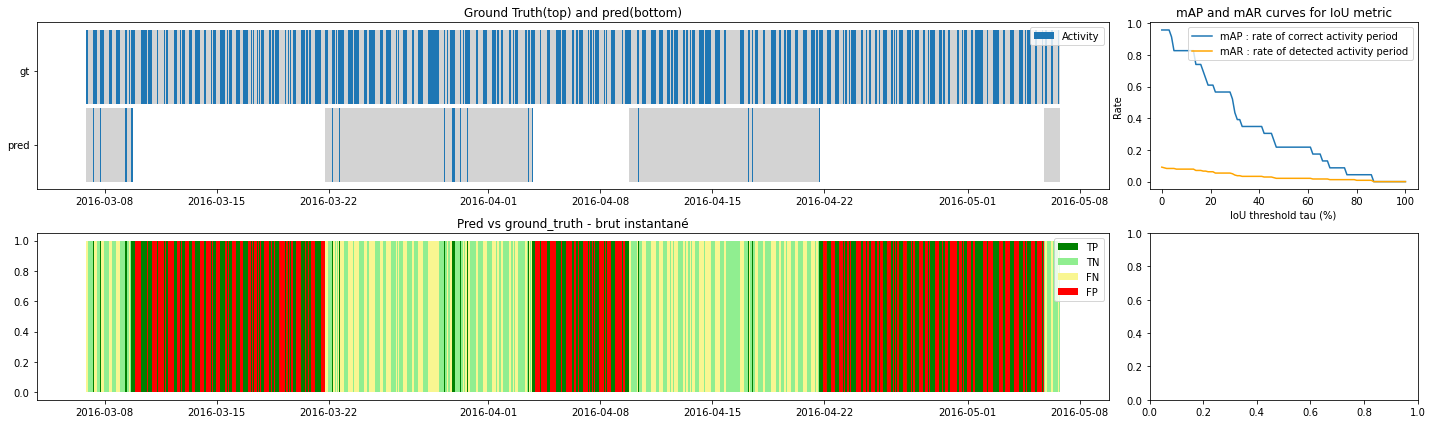

In [212]:
# ---- utils libs ----
import datetime
import sys


# --- Import functions from utils.py ---
sys.path.insert(0,'..')
from utils import convertToSequenceParameters, read_pickle_dataset

# --- Import functions from preprocessing.py ---
sys.path.insert(0,'..')
from preprocessing import data_preprocessing

# --- Import functions from visualize.py ---
sys.path.insert(0,'../src/visualization')
from visualize import visualize_load_curve_dataset, visualize_load_curve_resampled, visualize_train_load_curve, visualize_test_load_curve, visualize_test_train_load_curve, visualize_report_preprocessing

# --- Import functions from build_model.py ---
sys.path.insert(0,'../src/models/')
from build_model import model

# --- Import functions from train_model.py ---
sys.path.insert(0,'../src/models/')
from train_model import train

# --- Import functions from eval_model.py ---
sys.path.insert(0,'../src/models/')
from eval_model import plot_train_val_loss, plot_reconstructed_base_load_curve, plot_activity_histogram, plot_activity_distibrution, confusion_matrix, evaluate

# --- Import functions from predict_model.py ---
sys.path.insert(0,'../src/models/')
from predict_model import X_train_predict, X_test_predict, compute_threshold, compute_train_mae_loss, compute_test_mae_loss, plot_train_mae_loss, plot_test_mae_loss, detect_anomaly_sequence, get_anomaly_df, get_df_predict, get_specific_anomaly_sequence, plot_anomaly_sequences, plot_anomaly_data_points

# --- Import functions from postprocessing.py ---
sys.path.insert(0,'..')
from postprocessing import data_postprocessing, plot_postprocessing_anomalies


# --- Visualize Load Curve Dataset ---
print("LOAD DATASET...\n\n")
df_load_curve = visualize_load_curve_dataset("house1_power_blk2_labels.zip")


# --- Visualize Load Curve ---
print("\n\nPLOTING LOAD CURVE RESAMPLED...\n\n")
load_curve_resampled = visualize_load_curve_resampled("house1_power_blk2_labels.zip","60min")


# --- Define global variable ---
TIME_STEP = datetime.timedelta(minutes=1, seconds=30) # duration of a step in the resample dataset, originally 1 second
DURATION_TIME = datetime.timedelta(minutes=60) # duration of a sequence
OVERLAP_PERIOD_PERCENT = 0.8 # 0.5 <=> 50% overlapping
TIMEFRAMES = [(datetime.time(0,0,0), datetime.time(3,0,0))] # timeframes we consider as unactive
STRATEGY = "off_peak_time" # device, off_peak_time, label 
METHOD = "method_prediction_1" # method to choose for aggregating sequences
SPLIT_METHOD = "random_days" # method for train test split, None or "random_days"

print("CONVERTING GLOBAL USER PARAMETERS...\n")
SEQUENCE_LENGTH, OVERLAP_PERIOD = convertToSequenceParameters(TIME_STEP, DURATION_TIME, OVERLAP_PERIOD_PERCENT)
print("\t\tValeur choisie \t Equivalent sequence\nTimestep : \t {}\nDuration :\t {} \t -->  {} \nOverlap :\t {} \t\t -->  {}".format(TIME_STEP, DURATION_TIME, SEQUENCE_LENGTH, OVERLAP_PERIOD_PERCENT, OVERLAP_PERIOD))


# --- Pre Processing ---
print("STARTING PREPROCESSING...\n")
train_df, test_df, X_train, y_train, X_test, y_test = data_preprocessing(timeframes = TIMEFRAMES
                                                                         ,sequence_length = SEQUENCE_LENGTH
                                                                         ,overlap_period = OVERLAP_PERIOD
                                                                         ,resample_period = TIME_STEP
                                                                         ,strategy = STRATEGY
                                                                         ,split_method=SPLIT_METHOD)

print("PRINTING PREPROCESSING REPORT...\n")
report_classification = visualize_report_preprocessing(X_train, y_train, X_test, y_test
                                                       ,TIMEFRAMES
                                                       ,SEQUENCE_LENGTH
                                                       ,OVERLAP_PERIOD
                                                       ,TIME_STEP
                                                       ,STRATEGY)
                                                                                                                         

print("PLOTING TRAIN LOAD CURVE (base load curve)(" + STRATEGY + ")...")
visualize_train_load_curve(train_df, STRATEGY)

print("PLOTING TEST LOAD CURVE (" + STRATEGY + ")...")
visualize_test_load_curve(test_df, STRATEGY)

print("PLOTING TRAIN TEST LOAD CURVE (" + STRATEGY + ")...")
visualize_test_train_load_curve(train_df, test_df, STRATEGY)

# --- Build Model ---
print("\n\nBUILDING MODEL...")
model = model(X_train)

# --- Train Model ---
print("\n\nTRAININ MODEL...")
history = train(model, X_train)

# --- Evaluation Model ---
print("\n\nPLOTING TRAIN AND VALIDATION LOSS...")
plot_train_val_loss(history)


###### X_train prediction ######
# --- Prediction Model on X_train ---
print("\n\nMAKING PREDICTION FOR X_train...")
X_train_pred = X_train_predict(model, X_train)

# --- Compute train mae loss
print("\n\nCOMPUTING TRAIN MAE LOSS...")
train_mae_loss = compute_train_mae_loss(X_train_pred, X_train)

# --- Compute Threshold ---
print("\n\nCOMPUTING THRESHOLD...")
threshold = compute_threshold(X_train_pred, X_train)

# --- Plot train mae loss ---
print("\n\nPLOTING TRAIN MAE LOSS...")
plot_train_mae_loss(X_train_pred, X_train)



# --- Plot reconstructed base load curve
print("\n\nPLOTING RECONSTRUCTED BASE LOAD CURVE...")
plot_reconstructed_base_load_curve(X_train, X_train_pred)


###### X_test prediction ######
# --- Prediction Model on X_test ---
print("\n\nMAKING PREDICTION FOR X_test...")
X_test_pred = X_test_predict(model, X_test)

# --- Compute test mae loss
print("\n\nCOMPUTING TEST MAE LOSS...")
test_mae_loss = compute_test_mae_loss(X_test_pred, X_test)

# --- Plot test mae loss ---
print("\n\nPLOTING TEST MAE LOSS...")
plot_test_mae_loss(X_test_pred, X_test)


# --- Detect anomalies ---
print("\n\nDETECTING ANOMALIES...")
sequences_anomalies_idx, data_anomalies_idx = detect_anomaly_sequence(test_mae_loss, threshold, SEQUENCE_LENGTH, y_test)

# --- Build anomaly dataframe ---
print("\n\nBUILDING ANOMALY DATAFRAME...")
df_anomalies = get_anomaly_df(data_anomalies_idx, test_df)
print(df_anomalies)

# --- Build prediction dataframe ---
print("\n\nBUILDING PREDICTION DATAFRAME...")
df_predict = get_df_predict(test_df, df_anomalies)

# --- Visualize Specific sequence anomalies ---
print("\n\nEXPORTING SPECIFIC SEQUENCE ANOMALIES...")
get_specific_anomaly_sequence(0, sequences_anomalies_idx, y_test)

# --- Plot anomaly sequences ---
print("\n\nPLOTING ANOMALY SEQUENCE...")
plot_anomaly_sequences(test_df, data_anomalies_idx)

# --- Plot anomaly data points ---
print("\n\nPLOTING ANOMALY DATA POINTS...")
plot_anomaly_data_points(test_df, data_anomalies_idx, threshold)

# --- Plot activity histogram ---
print("\n\nPLOTING ACTIVITY HISTOGRAM...")
plot_activity_histogram(df_anomalies, test_df)

# --- Plot activity distribution ---
print("\n\nPLOTING ACTIVITY DISTRIBUTION...")
plot_activity_distibrution(df_predict)

# --- Plot confusion matrix ---
print("\n\nPLOTING CONFUSION MATRIX...")
confusion_matrix(test_df, df_predict)

# --- Post Processing --- #
print("\n\nPOSTPROCESSING...")
data_postprocessing(y_test, SEQUENCE_LENGTH, sequences_anomalies_idx, True)

# --- Load data prediction post processing --- #
print("\n\nLOADING DATA PREDICTION POSTPROCESSING...")
data_prediction_post_process = read_pickle_dataset("data_prediction.pkl")

# --- Plot detected anoamlies after post processing --- #
print("\n\nPLOTING DETECTED ANOMALIES (AFTER POST PROCESSING)...")
plot_postprocessing_anomalies(data_prediction_post_process, test_df)

# --- PLot direct and IoU threshold
print("\n\nPLOTING EVALUATION PLOT (DIRECT AND IoU THRESHOLD)...")


y_pred = data_prediction_post_process[["Timestamp", METHOD]]
y_true = df_load_curve[(df_load_curve.index>=y_pred["Timestamp"].min())&(df_load_curve.index<=y_pred["Timestamp"].max())].reset_index()[["datetime", "activity"]]

IoU_thresholds, MAP, MAR = evaluate(y_pred, y_true, display_plots=True)

# DEGUB

In [215]:
test_df

,mains,activity,hour
datetime,,,
2016-03-06 19:00:00,0.157591,1,19.000000
2016-03-06 19:01:30,0.251187,1,19.016667
2016-03-06 19:03:00,0.231822,1,19.050000
2016-03-06 19:04:30,0.402876,1,19.066667
2016-03-06 19:06:00,1.861678,1,19.100000
...,...,...,...
2016-05-06 18:52:30,-0.610539,0,18.866667
2016-05-06 18:54:00,-0.723499,1,18.900000
2016-05-06 18:55:30,-0.861203,1,18.916667


In [221]:
y_pred

,Timestamp,method_prediction_1
0,2016-03-06 19:00:00,0
1,2016-03-06 19:01:30,0
2,2016-03-06 19:03:00,0
3,2016-03-06 19:04:30,0
4,2016-03-06 19:06:00,0
...,...,...
10483,2016-05-06 18:40:30,0
10484,2016-05-06 18:42:00,0
10485,2016-05-06 18:43:30,0
10486,2016-05-06 18:45:00,0


In [225]:
df_load_curve

,mains,activity,hour
datetime,,,
2016-03-06 00:00:00,473.0,0,0.000000
2016-03-06 00:00:01,474.0,0,0.000000
2016-03-06 00:00:02,476.0,0,0.000000
2016-03-06 00:00:03,476.0,0,0.000000
2016-03-06 00:00:04,475.0,0,0.000000
...,...,...,...
2016-05-07 22:59:55,604.0,0,22.983333
2016-05-07 22:59:56,602.0,0,22.983333
2016-05-07 22:59:57,602.0,0,22.983333


In [231]:
y_true

,datetime,activity
0,2016-03-06 19:00:00,1
1,2016-03-06 19:00:01,1
2,2016-03-06 19:00:02,1
3,2016-03-06 19:00:03,1
4,2016-03-06 19:00:04,1
...,...,...
5269586,2016-05-06 18:46:26,0
5269587,2016-05-06 18:46:27,0
5269588,2016-05-06 18:46:28,0
5269589,2016-05-06 18:46:29,0


In [232]:
df_load_curve[df_load_curve.index.isin(y_pred["Timestamp"])].reset_index()[["datetime", "activity"]]

,datetime,activity
0,2016-03-06 19:00:00,1
1,2016-03-06 19:01:30,1
2,2016-03-06 19:03:00,1
3,2016-03-06 19:04:30,1
4,2016-03-06 19:06:00,1
...,...,...
10483,2016-05-06 18:40:30,0
10484,2016-05-06 18:42:00,0
10485,2016-05-06 18:43:30,0
10486,2016-05-06 18:45:00,0


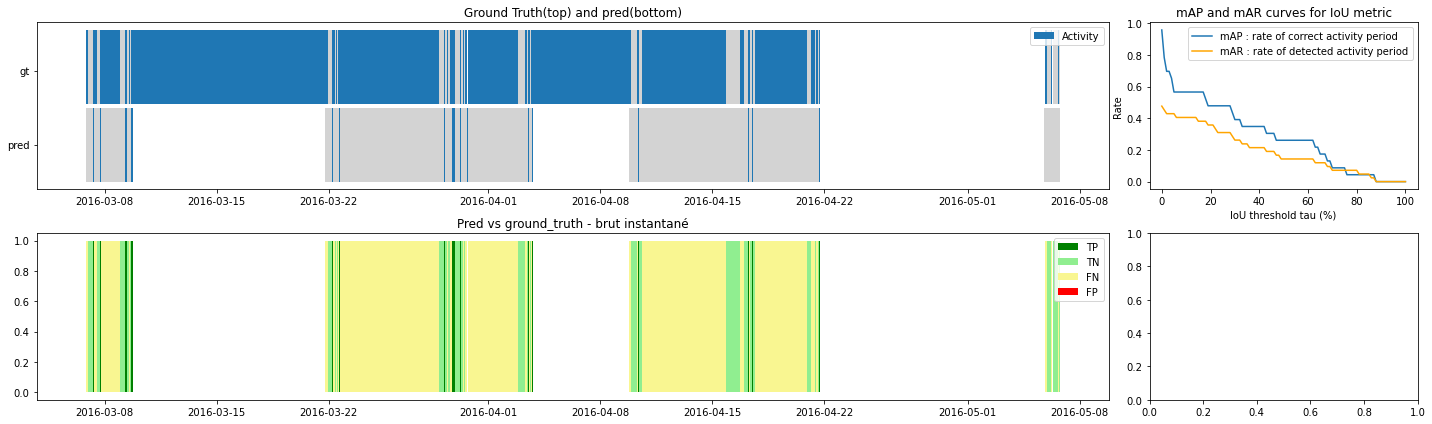

In [233]:
IoU_thresholds, MAP, MAR = evaluate(y_pred, df_load_curve[df_load_curve.index.isin(y_pred["Timestamp"])].reset_index()[["datetime", "activity"]], display_plots=True)

In [239]:
import utils
from utils import plot_confusion_matrix, plot_activity_hist, detect_stages, get_TPTNFPFN, get_IoU, get_activity_stages, broken_barh_x

def evaluate(pred, df_gt, display_plots=True):
    """
    Evaluer les prédictions en terme de mAP (mean avergae precision) et mAR (mean average recall)
    Args :
        - pred : dataframe de 2 colonnes : (timestamp, activity_prediction)
        - gt : dataframe de 2 colonnes : (timestamp, true_activity)
        - plot_recap : wether or not to display the summary of predicted and true activity
        - plot_metrics : wether or not to display the metrics plots
    Returns :
        - list of (IoU threshold, mAP, mAR)
        (- side effect : plots)
    """

    # resample_period = pred.iloc[1,0] - pred.iloc[0,0] # non utilisé
    
    colActivity_df_gt = df_gt.columns[1]
    colActivity_pred = pred.columns[1]

    df_gt_period = detect_stages(df_gt, colActivity_df_gt, df_gt.columns[0])
    pred_period = detect_stages(pred, colActivity_pred, pred.columns[0])
    
    df_merged = pred.set_index(pred.columns[0]).join(df_gt.set_index(df_gt.columns[0]), how='outer').fillna(method="ffill")
    df_merged = get_TPTNFPFN(df_merged, col_pred=colActivity_pred, col_gt=colActivity_df_gt)#.loc[:, ["TP"	,"TN",	"FP",	"FN"]]
    df_merged = df_merged.reset_index().rename(columns={"index":'datetime'})

    # restriction aux périodes ground_truth d'activité
    df_gt_period_activity = get_activity_stages(df_gt_period, colActivity_df_gt)
    # restriction aux périodes prédites d'activité
    pred_period_activity = get_activity_stages(pred_period, colActivity_pred)
    
    # # ajout de la colonne de metrique IoU à la dataframe des predictions
    l = []
    for ts_min, ts_max in zip(pred_period_activity.iloc[:,1], pred_period_activity.iloc[:,2]): # col 1 for timestamp min, col 2 for timestamp max
        l.append((get_IoU(df_gt_period, df_gt_period.columns[1], df_gt_period.columns[2]
                            , ts_min, ts_max, colActivity_df_gt,  activity=1))[3])
    pred_period_activity["IoU"] = np.array(l)

     # ajout de la colonne de metrique IoU à la dataframe ground_truth
    l = []
    for ts_min, ts_max in zip(df_gt_period_activity.iloc[:,1], df_gt_period_activity.iloc[:,2]):
        l.append((get_IoU(pred_period,pred_period.columns[1], pred_period.columns[2]
                        , ts_min, ts_max, colActivity_pred, 1)[3]))
    df_gt_period_activity["IoU"] = np.array(l)
    df_gt_period_activity.head()

    
    # === Calcul des métriques ===

    tau_range = np.linspace(0,1,101)
    
    # calcul du mAP
    N = len(pred_period_activity)
    map = []
    for tau in tau_range:
        map.append(len(pred_period_activity[pred_period_activity["IoU"]>tau])/N)

    # calcul du mAR
    N = len(df_gt_period_activity)
    mar = []
    for tau in tau_range:
        mar.append(len(df_gt_period_activity[df_gt_period_activity["IoU"]>tau])/N)


     #=================== = Plots = ====================

    if display_plots:
        fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [4, 1]})
        fig.set_size_inches(20, 6)
    
        # Plot summary 0
        col_timestamp_min_pred_period = pred_period.columns[1]
        col_timestamp_max_pred_period = pred_period.columns[2]
        times1_pred, times0_pred = broken_barh_x(pred_period, colActivity_pred, col_timestamp_min_pred_period, col_timestamp_max_pred_period)
        ax[0,0].broken_barh(times1_pred, (0,1), label = "Activity")
        ax[0,0].broken_barh(times0_pred, (0,1), facecolors='lightgray')

        col_timestamp_min_dfgt_period = df_gt_period.columns[1]
        col_timestamp_max_dfgt_period = df_gt_period.columns[2]
        times1_gt, times0_gt = broken_barh_x(df_gt_period, colActivity_df_gt, col_timestamp_min_dfgt_period, col_timestamp_max_dfgt_period)
        ax[0,0].broken_barh(times1_gt, (1.05,1))
        ax[0,0].broken_barh(times0_gt, (1.05,1), facecolors='lightgray')
        
        try:
            ax[0,0].set_yticks([0.5, 1.5], labels=['pred', 'gt'])
        except(TypeError):
            ax[0,0].set_yticks([0,5, 1,5])
            ax[0,0].set_yticklabels(['pred', 'gt'])
            ax[0,0].set_ylim(bottom = 0, top = 2)
            
        #ax[0,0].set_yticks([0.5, 1.5], labels=['pred', 'gt'])
        ax[0,0].legend()
        ax[0,0].set_title("Ground Truth(top) and pred(bottom)")

        # Plot summary 1
        for case, color in zip(["TP", "TN", "FN","FP"], ["green", "lightgreen", "#F9F691","red"]):
            df_tp = detect_stages(df_merged, case, df_merged.columns[0])
            times, _ = broken_barh_x(df_tp, case, df_tp.columns[1], df_tp.columns[2])
            ax[1,0].broken_barh(times, (0,1), label = case, facecolors=color)

        ax[1,0].legend()
        ax[1,0].set_title("Pred vs ground_truth - brut instantané")
        plt.tight_layout()

        # Plot curves
        ax[0,1].plot(map, label = "mAP : rate of correct activity period")
        ax[0,1].plot(mar, c='orange', label="mAR : rate of detected activity period")
        ax[0,1].set_title("mAP and mAR curves for IoU metric")
        ax[0,1].set_ylabel("Rate")
        ax[0,1].set_xlabel("IoU threshold tau (%)")
        ax[0,1].legend()

        
    return (tau_range, map, mar)

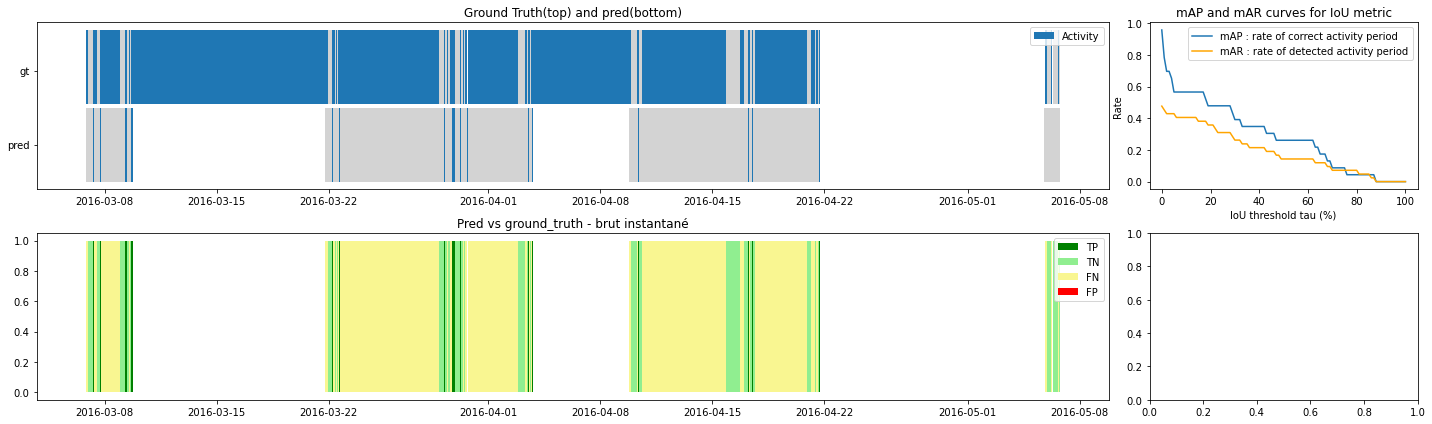

In [240]:
IoU_thresholds, MAP, MAR = evaluate(y_pred, df_load_curve[df_load_curve.index.isin(y_pred["Timestamp"])].reset_index()[["datetime", "activity"]], display_plots=True)

In [243]:
pred, df_gt, display_plots = y_pred, df_load_curve[df_load_curve.index.isin(y_pred["Timestamp"])].reset_index()[["datetime", "activity"]], True

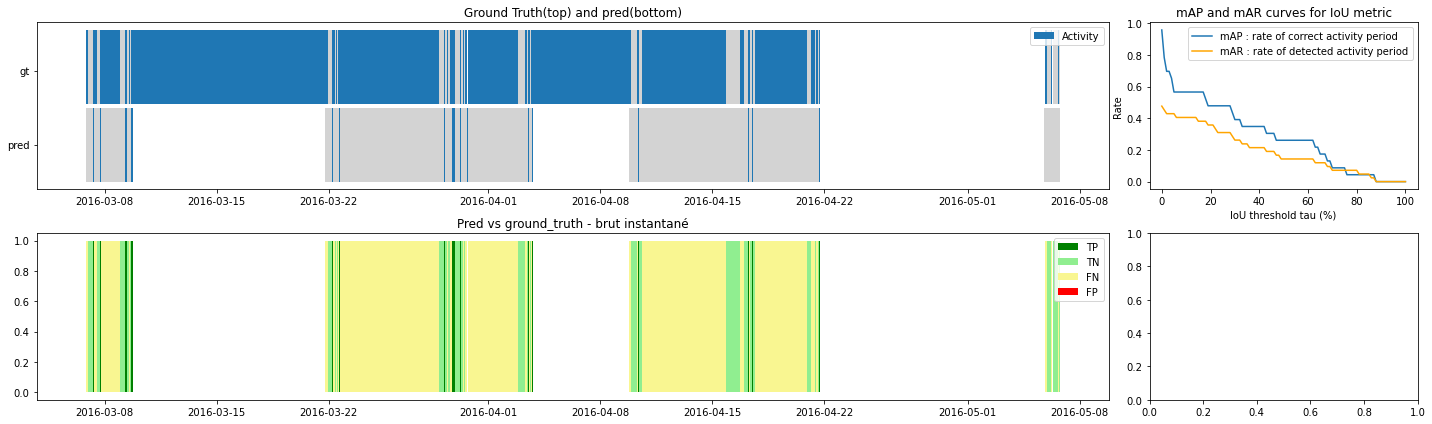

In [254]:
colActivity_df_gt = df_gt.columns[1]
colActivity_pred = pred.columns[1]

df_gt_period = detect_stages(df_gt, colActivity_df_gt, df_gt.columns[0])
pred_period = detect_stages(pred, colActivity_pred, pred.columns[0])

df_merged = pred.set_index(pred.columns[0]).join(df_gt.set_index(df_gt.columns[0]), how='outer').fillna(method="ffill")
df_merged = get_TPTNFPFN(df_merged, col_pred=colActivity_pred, col_gt=colActivity_df_gt)#.loc[:, ["TP"	,"TN",	"FP",	"FN"]]
df_merged = df_merged.reset_index().rename(columns={"index":'datetime'})

# restriction aux périodes ground_truth d'activité
df_gt_period_activity = get_activity_stages(df_gt_period, colActivity_df_gt)
# restriction aux périodes prédites d'activité
pred_period_activity = get_activity_stages(pred_period, colActivity_pred)

# # ajout de la colonne de metrique IoU à la dataframe des predictions
l = []
for ts_min, ts_max in zip(pred_period_activity.iloc[:,1], pred_period_activity.iloc[:,2]): # col 1 for timestamp min, col 2 for timestamp max
    l.append((get_IoU(df_gt_period, df_gt_period.columns[1], df_gt_period.columns[2]
                        , ts_min, ts_max, colActivity_df_gt,  activity=1))[3])
pred_period_activity["IoU"] = np.array(l)

    # ajout de la colonne de metrique IoU à la dataframe ground_truth
l = []
for ts_min, ts_max in zip(df_gt_period_activity.iloc[:,1], df_gt_period_activity.iloc[:,2]):
    l.append((get_IoU(pred_period,pred_period.columns[1], pred_period.columns[2]
                    , ts_min, ts_max, colActivity_pred, 1)[3]))
df_gt_period_activity["IoU"] = np.array(l)
df_gt_period_activity.head()


# === Calcul des métriques ===

tau_range = np.linspace(0,1,101)

# calcul du mAP
N = len(pred_period_activity)
map = []
for tau in tau_range:
    map.append(len(pred_period_activity[pred_period_activity["IoU"]>tau])/N)

# calcul du mAR
N = len(df_gt_period_activity)
mar = []
for tau in tau_range:
    mar.append(len(df_gt_period_activity[df_gt_period_activity["IoU"]>tau])/N)


    #=================== = Plots = ====================

if display_plots:
    fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [4, 1]})
    fig.set_size_inches(20, 6)

    # Plot summary 0
    col_timestamp_min_pred_period = pred_period.columns[1]
    col_timestamp_max_pred_period = pred_period.columns[2]
    times1_pred, times0_pred = broken_barh_x(pred_period, colActivity_pred, col_timestamp_min_pred_period, col_timestamp_max_pred_period)
    ax[0,0].broken_barh(times1_pred, (0,1), label = "Activity")
    ax[0,0].broken_barh(times0_pred, (0,1), facecolors='lightgray')

    col_timestamp_min_dfgt_period = df_gt_period.columns[1]
    col_timestamp_max_dfgt_period = df_gt_period.columns[2]
    times1_gt, times0_gt = broken_barh_x(df_gt_period, colActivity_df_gt, col_timestamp_min_dfgt_period, col_timestamp_max_dfgt_period)
    ax[0,0].broken_barh(times1_gt, (1.05,1))
    ax[0,0].broken_barh(times0_gt, (1.05,1), facecolors='lightgray')
    
    try:
        ax[0,0].set_yticks([0.5, 1.5], labels=['pred', 'gt'])
    except(TypeError):
        ax[0,0].set_yticks([0,5, 1,5])
        ax[0,0].set_yticklabels(['pred', 'gt'])
        ax[0,0].set_ylim(bottom = 0, top = 2)
        
    #ax[0,0].set_yticks([0.5, 1.5], labels=['pred', 'gt'])
    ax[0,0].legend()
    ax[0,0].set_title("Ground Truth(top) and pred(bottom)")

    # Plot summary 1
    for case, color in zip(["TP", "TN", "FN","FP"], ["green", "lightgreen", "#F9F691","red"]):
        df_tp = detect_stages(df_merged, case, df_merged.columns[0])
        times, _ = broken_barh_x(df_tp, case, df_tp.columns[1], df_tp.columns[2])
        ax[1,0].broken_barh(times, (0,1), label = case, facecolors=color)

    ax[1,0].legend()
    ax[1,0].set_title("Pred vs ground_truth - brut instantané")
    plt.tight_layout()

    # Plot curves
    ax[0,1].plot(map, label = "mAP : rate of correct activity period")
    ax[0,1].plot(mar, c='orange', label="mAR : rate of detected activity period")
    ax[0,1].set_title("mAP and mAR curves for IoU metric")
    ax[0,1].set_ylabel("Rate")
    ax[0,1].set_xlabel("IoU threshold tau (%)")
    ax[0,1].legend()

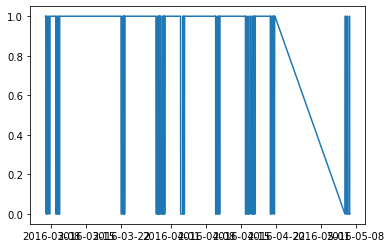

In [253]:
plt.plot(df_gt["datetime"], df_gt["activity"])

In [255]:
df_gt

,datetime,activity
0,2016-03-06 19:00:00,1
1,2016-03-06 19:01:30,1
2,2016-03-06 19:03:00,1
3,2016-03-06 19:04:30,1
4,2016-03-06 19:06:00,1
...,...,...
10483,2016-05-06 18:40:30,0
10484,2016-05-06 18:42:00,0
10485,2016-05-06 18:43:30,0
10486,2016-05-06 18:45:00,0


In [259]:
df_gt_period[df_gt_period["duration_min"]>24*60]

,activity,datetime_min,datetime_max,duration_min,duration_sec
stage,,,,,
6,1,2016-03-07 16:43:30,2016-03-08 21:42:00,1738.0,104310.0
14,1,2016-03-09 15:10:30,2016-03-21 22:31:30,17721.0,1063260.0
22,1,2016-03-22 15:31:30,2016-03-28 22:21:00,9049.0,542970.0
40,1,2016-03-30 16:42:00,2016-04-02 20:54:00,4572.0,274320.0
46,1,2016-04-03 15:42:00,2016-04-09 21:45:00,9003.0,540180.0
54,1,2016-04-10 16:55:30,2016-04-15 21:24:00,7468.0,448110.0
68,1,2016-04-17 18:18:00,2016-04-20 21:33:00,4515.0,270900.0


In [256]:
test_df

,mains,activity,hour
datetime,,,
2016-03-06 19:00:00,0.157591,1,19.000000
2016-03-06 19:01:30,0.251187,1,19.016667
2016-03-06 19:03:00,0.231822,1,19.050000
2016-03-06 19:04:30,0.402876,1,19.066667
2016-03-06 19:06:00,1.861678,1,19.100000
...,...,...,...
2016-05-06 18:52:30,-0.610539,0,18.866667
2016-05-06 18:54:00,-0.723499,1,18.900000
2016-05-06 18:55:30,-0.861203,1,18.916667
